# Getting started

Once you've chosen your scenario, download the data from [the Iowa website](https://data.iowa.gov/Economy/Iowa-Liquor-Sales/m3tr-qhgy) in csv format. Start by loading the data with pandas. You may need to parse the date columns appropriately.

In [56]:
import datetime
import numpy as np
import pandas as pd

% matplotlib inline

In [60]:
df = pd.read_csv('/Users/karibenson/Downloads/Iowa_Liquor_sales_sample_10pct.csv.zip')
df.head()


,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,11/04/2015,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,$4.50,$6.75,12,$81.00,9.0,2.38
1,03/02/2016,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,$13.75,$20.63,2,$41.26,1.5,0.40
2,02/11/2016,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,$12.59,$18.89,24,$453.36,24.0,6.34
3,02/03/2016,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,$9.50,$14.25,6,$85.50,10.5,2.77
4,08/18/2015,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,$7.20,$10.80,12,$129.60,21.0,5.55


In [61]:
# removing $
cols = ["State Bottle Cost", "State Bottle Retail", "Sale (Dollars)"]
for col in cols:
    df[col] = df[col].apply(lambda x: float(x[1:]))
    

In [62]:
# converting format o dates:
df["Date"] = pd.to_datetime(df["Date"], format="%m/%d/%Y")
# uppercase Y in year gives 2014, lowercase y gives 14
# format refers to the form date is found in in orignal data.

In [63]:
# dropping bad values (any na's)
df = df.dropna()



In [55]:
# coverting floats to integers
df["Category"] = df["Category"].astype(int)
df["County Number"] = df["County Number"].astype(int)



/Users/karibenson/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/karibenson/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


# Explore the data

Perform some exploratory statistical analysis and make some plots, such as histograms of transaction totals, bottles sold, etc.

Problem/Goal:  To determine the zip code in which to open a new liquor store.  The best location will be assumed to be the zip code with the highest total sales.

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

In [65]:
pt = pd.pivot_table(df, index=["County Number", "County"], values=["Bottles Sold", "Sale (Dollars)"],
                               aggfunc=[np.sum, np.mean])
pt.head()

sum                        mean  \
                        Bottles Sold Sale (Dollars) Bottles Sold   
County Number County                                               
1.0           Adair             4650       55544.20     7.962329   
2.0           Adams              955       12441.71     4.081197   
3.0           Allamakee         7450       99000.00     7.136015   
4.0           Appanoose         8171       98429.87     7.856731   
5.0           Audubon           1694       19655.54     7.462555   

                                        
                        Sale (Dollars)  
County Number County                    
1.0           Adair          95.109932  
2.0           Adams          53.169701  
3.0           Allamakee      94.827586  
4.0           Appanoose      94.644106  
5.0           Audubon        86.588282

In [15]:
df['County'].unique()

array(['Bremer', 'Scott', 'Black Hawk', 'Story', 'Wright', 'Linn',
       'Wapello', 'Cerro Gordo', 'Polk', 'Benton', 'Mahaska', 'Lee',
       'Johnson', 'Jasper', 'Tama', 'Sioux', 'Dickinson', 'Pottawattamie',
       'Warren', 'Webster', 'Boone', 'Jackson', 'Carroll', 'Hamilton',
       'Woodbury', 'Washington', 'Floyd', 'Delaware', "O'Brien",
       'Buena Vista', 'Grundy', 'Dubuque', 'Adair', 'Crawford', 'Henry',
       'Guthrie', 'Winneshiek', 'Clay', 'Muscatine', 'Taylor', 'Harrison',
       'Hardin', 'Kossuth', 'Dallas', 'Decatur', 'Clinton', 'Butler',
       'Des Moines', 'Calhoun', 'Fayette', 'Jones', 'Hancock', 'Iowa',
       'Howard', 'Appanoose', 'Jefferson', 'Emmet', 'Marshall', 'Page',
       'Cedar', 'Clayton', 'Sac', 'Monona', 'Allamakee', 'Winnebago',
       'Poweshiek', 'Marion', 'Buchanan', 'Franklin', 'Cherokee',
       'Humboldt', 'Greene', 'Keokuk', 'Plymouth', 'Shelby', 'Clarke',
       'Palo Alto', 'Cass', 'Lyon', 'Pocahontas', 'Ida', 'Union',
       'Fremont', '

In [28]:
df2 = df.groupby(by=['County Number'], as_index=False).agg({'Bottles Sold': [np.sum]})
df2.head()


,County Number,Bottles Sold
,,sum
0,1.0,4650
1,2.0,955
2,3.0,7450
3,4.0,8171
4,5.0,1694


In [17]:
df3 = df.groupby(by=['County Number'], as_index=False).agg({'Sale (Dollars)': np.sum})
df3.head()

,County Number,Sale (Dollars)
0,1.0,55544.20
1,2.0,12441.71
2,3.0,99000.00
3,4.0,98429.87
4,5.0,19655.54


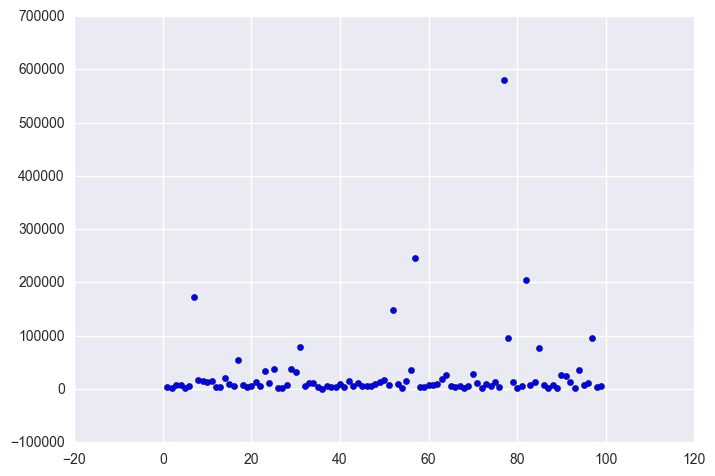

In [18]:
# Total sales per county number:
plt.scatter(df2['County Number'], df2['Bottles Sold'])
plt.show()

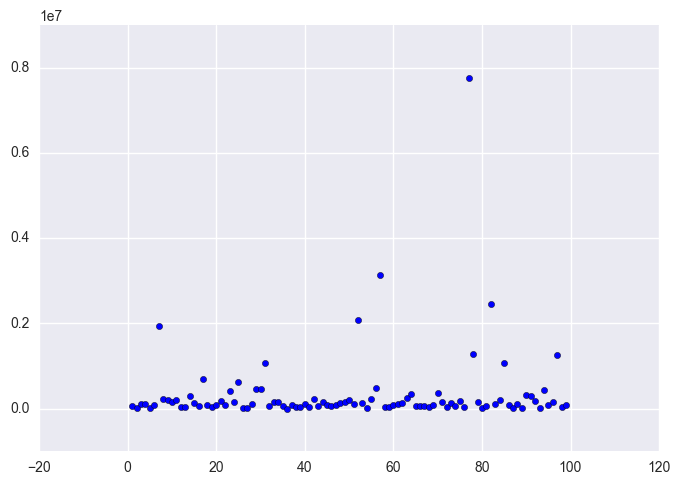

In [19]:
# Total sales per county number:
plt.scatter(df3['County Number'], df3['Sale (Dollars)'])
plt.show()

## Record your findings

Based on the scatterplots above, most counties seem to have a similar number of bottles sold and sales dollars.  There are a handful of counties that are above this, and yet another county that is even further above that.

# Mine the data
Now you are ready to compute the variables you will use for your regression from the data. For example, you may want to
compute total sales per store from Jan to March of 2015, mean price per bottle, etc. Refer to the readme for more ideas appropriate to your scenario.

Pandas is your friend for this task. Take a look at the operations [here](http://pandas.pydata.org/pandas-docs/stable/groupby.html) for ideas on how to make the best use of pandas and feel free to search for blog and Stack Overflow posts to help you group data by certain variables and compute sums, means, etc. You may find it useful to create a new data frame to house this summary data.

# Refine the data
Look for any statistical relationships, correlations, or other relevant properties of the dataset.

In [111]:
df2.corr()

,,County Number,Bottles Sold
,,,sum
County Number,,1.000000,0.116032
Bottles Sold,sum,0.116032,1.000000


In [112]:
df3.corr()

,County Number,Sale (Dollars)
County Number,1.000000,0.119991
Sale (Dollars),0.119991,1.000000


By running the above correlations, there appears to be little connection between county number (thus, county) and either the number of bottles sold or the total sale in dollars.

# Build your models

Using scikit-learn or statsmodels, build the necessary models for your scenario. Evaluate model fit.

In [51]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
OLS_sales_bottles = smf.ols('Bottles Sold ~ County Number', df2).fit()
OLS_sales_bottles

In [54]:
OLS_sales_dollars = smf.ols('Sale (Dollars) ~ County Number', df3).fit()
OLS_sales_dollars

SyntaxError: invalid syntax (<unknown>, line 1)

# Present the Results

Present your conclusions and results. If you have more than one interesting model feel free to include more than one along with a discussion. Use your work in this notebook to prepare your write-up.

There was very little correlation between the variables.  Based on that, I would recommend to the client opening a store in the county with the highest total of bottles sold or the highest total sales in dollars.